In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()



'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx


/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine8

In [4]:
os.environ['DATA_PATH'] = '../../FE_FB_Torus_with_mixed/'

df_clean = pd.read_csv(os.environ['DATA_PATH'] + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: float(x['alpha']) if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
df_clean.shape

(3120, 274)

In [5]:
gd = do_feature_extract.graph_dicts[21]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

'/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine86.SpaceOne'

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [6]:
df_clean.loc[df_clean.Graph == name, ['Graph', 'Model', 'Info', 'alpha']]

,Graph,Model,Info,alpha
930,socfb-Pepperdine86,real-world,{'Info': 'no info'},NaN
931,socfb-Pepperdine86,ER,{'Info': 'no info'},NaN
932,socfb-Pepperdine86,BA circle,{'Info': 'no info'},NaN
933,socfb-Pepperdine86,BA full,{'Info': 'no info'},NaN
934,socfb-Pepperdine86,chung-lu,{'Info': 'no info'},NaN
935,socfb-Pepperdine86,hyperbolic,"{'n': 3565, 'k': 85.29910213243546, 'gamma': 5...",1.735476
936,socfb-Pepperdine86,1d-girg,"{'tau': 5.27297948141534, 'alpha': 1.328627776...",1.328628
937,socfb-Pepperdine86,2d-girg,"{'tau': 5.27297948141534, 'alpha': 1.422696454...",1.422696
938,socfb-Pepperdine86,3d-girg,"{'tau': 5.27297948141534, 'alpha': 1.636619358...",1.636619
939,socfb-Pepperdine86,4d-girg,"{'tau': 5.27297948141534, 'alpha': 2.202339986...",2.202340


diffmapping
extracting diffmaps


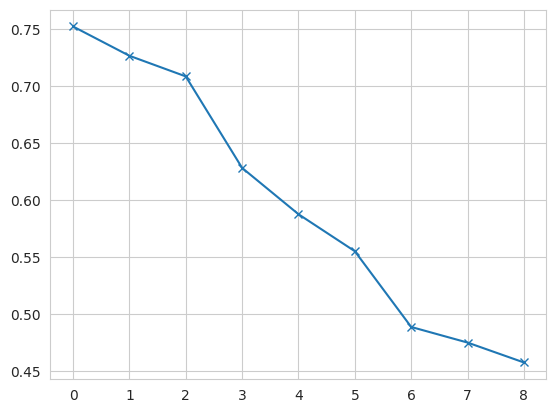

In [7]:
print('diffmapping')
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.5, eye_or_ones='eye')
print('extracting diffmaps')
pts_diffmap = np.array([diff_map(i, 10) for i in range(n)])
pts_diffmap = points.normalise_points_to_cube(pts_diffmap[:, 0:1])
pts_diffmap = points.PointsCube(pts_diffmap)

plt.plot(w[1:10]**5, marker='x')

In [8]:
info = df_clean.loc[(df_clean.Graph == name) & (df_clean.Model == '1d-cube-girg')].Info.values[0]
alpha = info['alpha']
const = info['const']
print(f'alpha: {alpha}, const: {const}')

weights = np.array(utils.graph_degrees_to_weights(g))

# MC = mcmc.MCMC_girg(g, weights, alpha, const, pts_diffmap.copy(), pool=True)
# MC_base = mcmc.MCMC_girg(g, weights, alpha, const, pts_diffmap.copy(), pool=False)

alpha: 1.2829507868096623, const: 9.8658629070003


In [10]:
import feature_extractor
fe = feature_extractor.FeatureExtractor([])

info, g_fit = fe.fit_ndgirg_non_c_implementation(2, utils.LCC, cube=True, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
starting search at const=0.30014650225639344; depth=6: For alpha=100.0


../benji_girgs/generation.py:398: RuntimeWarning: overflow encountered in power
  puv = np.stack([np.ones(cube_inf_norm.shape), ((wu * wv / W) / torus_inf_norm ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:399: RuntimeWarning: overflow encountered in power
  puv_cube = np.stack([np.ones(cube_inf_norm.shape), ((wu * wv / W) / cube_inf_norm ** d) ** alpha]).min(axis=0)


a: 0.15007325112819672, m: 0.30014650225639344, b: 0.6002930045127869, f_a: 48.288372093023256, f_m: 93.60581395348837, f_b: 174.88023255813954, goal: 88.37383720930232
a: 0.15007325112819672, m: 0.2251098766922951, b: 0.30014650225639344, f_a: 48.288372093023256, f_m: 71.39127906976744, f_b: 93.60581395348837, goal: 88.37383720930232
a: 0.2251098766922951, m: 0.2626281894743443, b: 0.30014650225639344, f_a: 71.39127906976744, f_m: 82.20348837209302, f_b: 93.60581395348837, goal: 88.37383720930232
a: 0.2626281894743443, m: 0.28138734586536884, b: 0.30014650225639344, f_a: 82.20348837209302, f_m: 87.69360465116279, f_b: 93.60581395348837, goal: 88.37383720930232
a: 0.28138734586536884, m: 0.2907669240608811, b: 0.30014650225639344, f_a: 87.69360465116279, f_m: 89.97383720930233, f_b: 93.60581395348837, goal: 88.37383720930232
calling goal_f(alpha=2.0)
starting search at const=0.1530452598498235; depth=6: For alpha=2.0
a: 0.07652262992491175, m: 0.1530452598498235, b: 0.306090519699647, 

In [68]:
info2 = {key: eval(var) for key, var in [x.split('=') for x in info.split('|')]}
alpha = info2['alpha']
const = info2['const']

print(f'alpha: {alpha}, const: {const}')

alpha: 1.0679125646587686, const: 0.10736827563553797


In [73]:
g_fit2, _, _, _, _ = generation.generate_GIRG_nk(n, 1, 2.1, alpha, weights=weights, const=const, points_type=points.PointsCube)
nk.overview(g_fit2)

const_in: 0.1934345267112439
Network Properties:
nodes, edges			3440, 149990
directed?			False
weighted?			False
isolated nodes			13
self-loops			0
density				0.025357
clustering coefficient		0.280665
min/max/avg degree		0, 532, 87.203488
degree assortativity		-0.006480
number of connected components	14
size of largest component	3427 (99.62 %)


In [72]:
nk.overview(g)

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [74]:
MC = mcmc.MCMC_girg(g, weights, alpha, const, pts_diffmap.copy(), pool=True)
MC_base = mcmc.MCMC_girg(g, weights, alpha, const, pts_diffmap.copy(), pool=False)

../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


(array([   3.,   31.,   53.,   21., 1881.,  850.,   18.,   29.,  204.,
         350.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

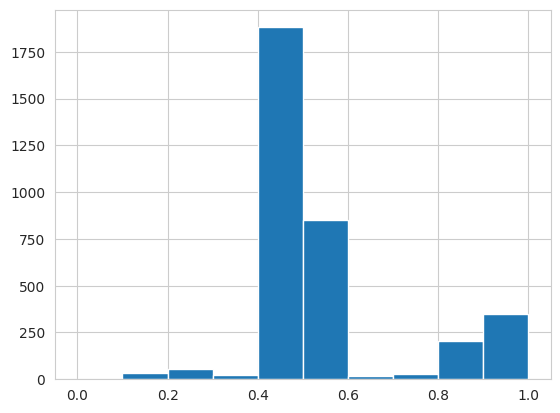

In [75]:
plt.hist(MC_base.pts)

In [76]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [77]:
# %matplotlib inline
MC.run_pool(10000, pool_size=10, jobs_per_worker=15, plot_every=20)

  0%|          | 0/10000 [00:00<?, ?it/s]../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
../benji_girgs/mcmc.py:136: RuntimeWarning: overflow encountere

In [78]:
MC.calculate_ll()

-2227296.410715085

(array([255., 280., 321., 381., 445., 357., 342., 323., 353., 383.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

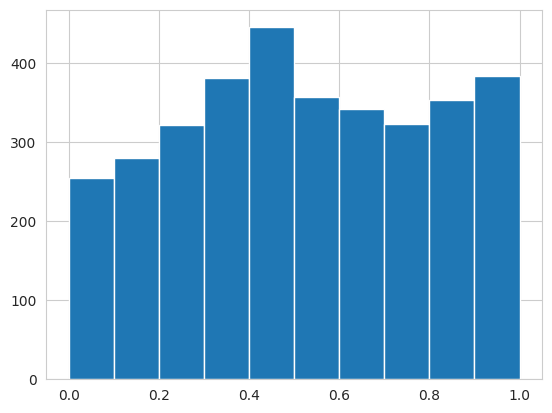

In [81]:
%matplotlib inline
plt.hist(MC.pts)

In [86]:
def asdf(self):
    tau = 2.1 # Ignored
    g, edges, weights, pts, const = generation.generate_GIRG_nk(self.n, self.d, tau, self.alpha, weights=self.weights_original,const=self.const,
                                                                pts=self.pts,
                                                                points_type=points.PointsCube)
    return g
g_out = asdf(MC)
nk.overview(g_out)
g_out2 = asdf(MC_base)
nk.overview(g_out2)

const_in: 0.1934345267112439


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:437: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:438: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


Network Properties:
nodes, edges			3440, 150739
directed?			False
weighted?			False
isolated nodes			10
self-loops			0
density				0.025484
clustering coefficient		0.280827
min/max/avg degree		0, 488, 87.638953
degree assortativity		-0.001974
number of connected components	11
size of largest component	3430 (99.71 %)
const_in: 0.1934345267112439
Network Properties:
nodes, edges			3440, 150319
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.025413
clustering coefficient		0.277134
min/max/avg degree		0, 531, 87.394767
degree assortativity		0.009949
number of connected components	16
size of largest component	3425 (99.56 %)


In [85]:
nk.overview(g)

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [87]:
gnx = nk.nxadapter.nk2nx(g)
A = nx.linalg.adjacency_matrix(gnx).todense()

gnx = nk.nxadapter.nk2nx(g_out)
A1 = nx.linalg.adjacency_matrix(gnx).todense()

gnx = nk.nxadapter.nk2nx(g_out2)
A2 = nx.linalg.adjacency_matrix(gnx).todense()


In [88]:
def quick_acc(A, A1):
    edge = A != 0
    out = np.array([[np.sum(A1[edge] == 1), np.sum(A1[edge] == 0)],
           [np.sum(A1[~edge] == 1), np.sum(A1[~edge] == 0)]])/ np.prod(A.shape)
    return out

def quick_summarise_CM(CM):
    # first row is true positive. second row is true negative
    out = CM.copy()
    out[0, :] = out[0, :] / np.sum(out[0, :])
    out[1, :] = out[1, :] / np.sum(out[1, :])
    return out

out = quick_acc(A, A1)
out
quick_summarise_CM(out)
print('===============')
out2 = quick_acc(A, A2)
out2
quick_summarise_CM(out2)

array([[0.00174672, 0.02394335],
       [0.02372972, 0.95058021]])

array([[0.06799208, 0.93200792],
       [0.02435541, 0.97564459]])

array([[0.00174537, 0.0239447 ],
       [0.02366009, 0.95064984]])

array([[0.06793945, 0.93206055],
       [0.02428394, 0.97571606]])

diffmapping
extracting diffmaps


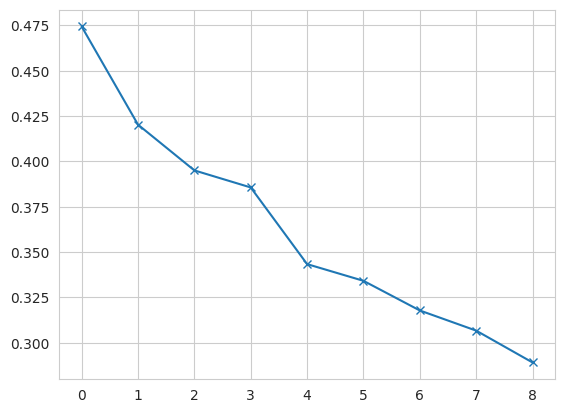

In [41]:
print('diffmapping')
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.5, eye_or_ones='eye')
print('extracting diffmaps')
pts_diffmap = np.array([diff_map(i, 20) for i in range(n)])
# pts_diffmap = points.normalise_points_to_cube(pts_diffmap[:, 0:2])
# pts_diffmap = points.PointsCube(pts_diffmap)

plt.plot(w[1:10]**5, marker='x')

(array([  2.,   0.,   0.,   0.,   0.,   2.,   2.,   3.,   2., 751.]),
 array([-1.77087337e-02, -1.59309532e-02, -1.41531727e-02, -1.23753923e-02,
        -1.05976118e-02, -8.81983128e-03, -7.04205079e-03, -5.26427030e-03,
        -3.48648981e-03, -1.70870932e-03,  6.90711736e-05]),
 <BarContainer object of 10 artists>)

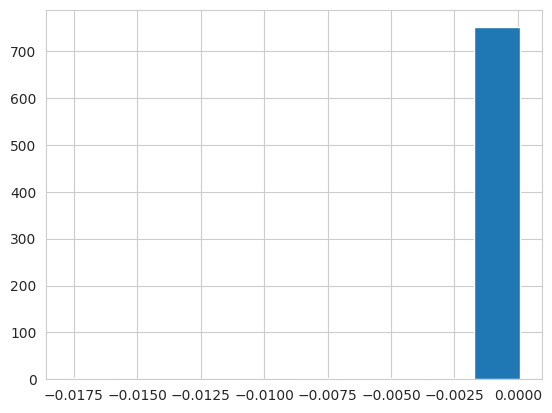

In [42]:
plt.hist(pts_diffmap[:, 0])

In [30]:
info = df_clean.loc[(df_clean.Graph == name) & (df_clean.Model == '1d-cube-girg')].Info.values[0]
alpha = info['alpha']
const = info['const']
print(f'alpha: {alpha}, const: {const}')

MC = mcmc.MCMC_girg(g, np.array(utils.graph_degrees_to_weights(g)), alpha, const, pts_diffmap.copy(), pool=True)
MC_base = mcmc.MCMC_girg(g, np.array(utils.graph_degrees_to_weights(g)), alpha, const, pts_diffmap.copy(), pool=False)

alpha: 1.5869080089263574, const: 7.734498920196103


../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


In [31]:
MC.pts.shape

(762, 2)

In [34]:
MC.pts[:, 1]

PointsCube([0.99352207, 0.99054956, 0.99088549, 0.99324685, 0.99467663,
            0.99534151, 0.99808613, 0.99291848, 0.98087325, 0.99100153,
            0.99423054, 0.99433308, 0.99326366, 0.98916024, 0.99057562,
            0.98757465, 0.99456838, 0.99649185, 0.99711782, 0.99264545,
            0.99387361, 0.9958587 , 0.00417105, 0.99258814, 0.99308226,
            0.9896171 , 0.98322019, 0.99026647, 0.99413517, 0.99578473,
            0.99662289, 0.9890113 , 0.99733096, 0.99470944, 0.3286151 ,
            0.99254532, 0.99397097, 0.98845663, 0.98853556, 0.9958135 ,
            0.99514024, 0.99065909, 0.99167743, 0.9903566 , 0.99047175,
            0.9876432 , 0.99075021, 0.98760763, 0.62765726, 0.99082377,
            0.99553945, 0.99437005, 0.99203503, 0.99589806, 0.99694541,
            0.98893035, 0.99295248, 0.99456952, 0.99373583, 0.99636659,
            0.99695726, 0.99223638, 0.9893485 , 0.99396813, 0.99295123,
            0.99424073, 0.99409554, 0.99729096, 0.99522053, 0.99

In [47]:
import importlib
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [48]:
n = 1500
d = 1
tau = 2.1
alpha = 1.2
desiredAvgDegree = 100.0

# This const was generated for the power law distribution
g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,points_type=points.PointsCube)

weights = np.array(utils.graph_degrees_to_weights(g))
const2 = girgs.scaleWeights(weights, desiredAvgDegree, d, alpha)

# TODO why are const and const2 quite different?


print('diffmapping')
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.5, eye_or_ones='eye')
print('extracting diffmaps')
pts_diffmap = np.array([diff_map(i, 10) for i in range(n)])
pts_diffmap = points.normalise_points_to_cube(pts_diffmap[:, 0:2])
pts_diffmap = points.PointsCube(pts_diffmap)

pts_init = points.PointsCube(np.random.uniform(size=(n,1)))

print('initialising mcmc')
mcmc_base = mcmc.MCMC_girg(g, weights, alpha, const2, pts_diffmap, pool=False)
mcmc_pool = mcmc.MCMC_girg(g, weights, alpha, const2, pts_diffmap.copy(), pool=True)

# mcmc_cheat = mcmc.MCMC_girg(g, weights, alpha, const2, pts)
# mcmc_diffmap = mcmc.MCMC_girg(g, weights, alpha, const2, pts_diffmap.copy())
# mcmc_cheat.ll
# mcmc_diffmap.ll

const_in: 18.935574445654247
diffmapping
extracting diffmaps
initialising mcmc


In [49]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [ ]:
mcmc_pool.run_pool(30000, pool_size=15, jobs_per_worker=2, plot_every=20)

 77%|███████▋  | 23070/30000 [04:59<01:29, 77.76it/s]

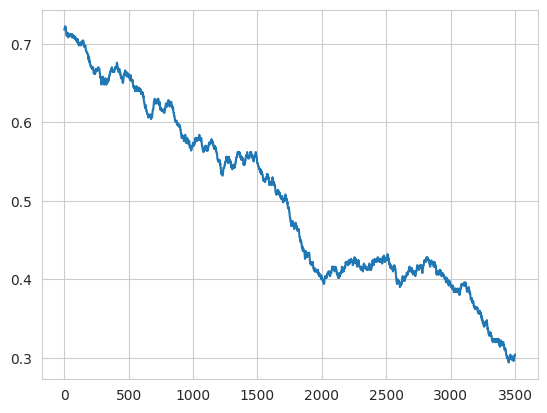

In [46]:
%matplotlib inline
mcmc_pool.acceptances_plot(convolve_width=500)

In [2]:
mcmc_pool.calculate_ll()

NameError: name 'mcmc_pool' is not defined

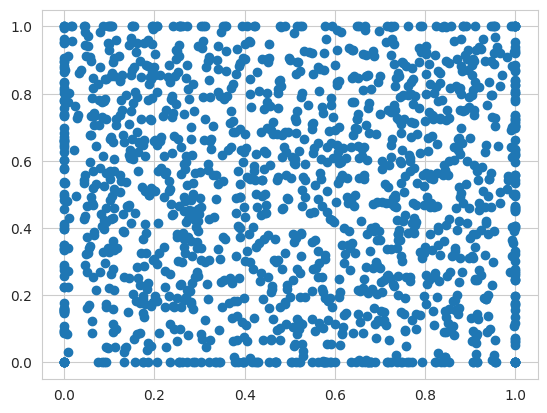

In [10]:
%matplotlib inline
xs = mcmc_pool.pts[:, 0]
ys = mcmc_pool.pts[:, 1]
plt.scatter(xs, ys)

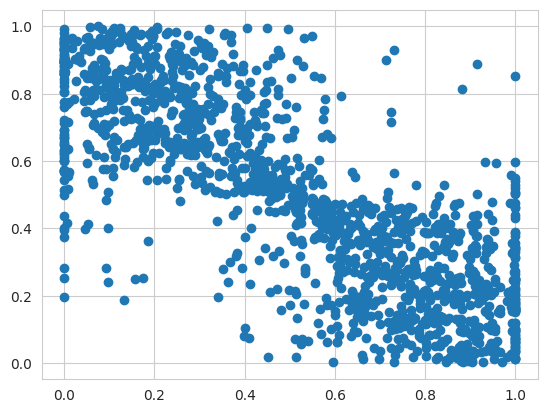

In [11]:
plt.scatter(xs, pts)

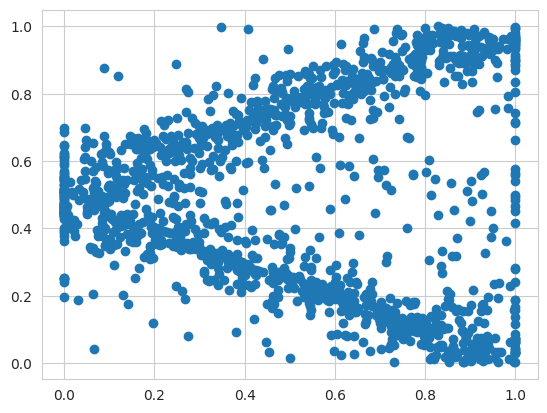

In [12]:
plt.scatter(ys, pts)

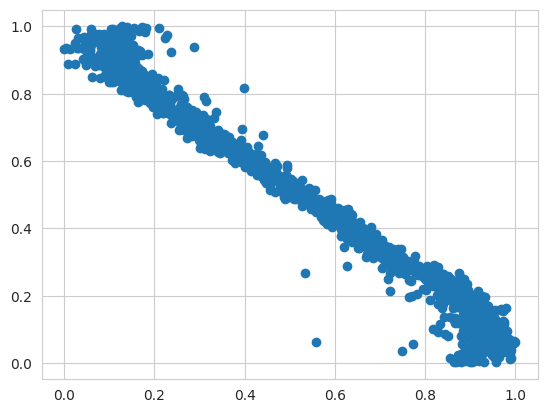

In [13]:
plt.scatter(pts_diffmap[:, 0], pts)

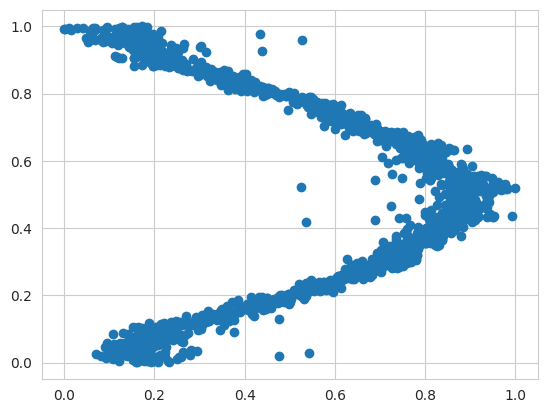

In [15]:
plt.scatter(pts_diffmap[:, 1], pts)

(array([  3.,   9.,  35., 168., 453., 567., 179.,  63.,  18.,   5.]),
 array([-0.85238514, -0.68670722, -0.5210293 , -0.35535138, -0.18967346,
        -0.02399554,  0.14168238,  0.3073603 ,  0.47303822,  0.63871614,
         0.80439406]),
 <BarContainer object of 10 artists>)

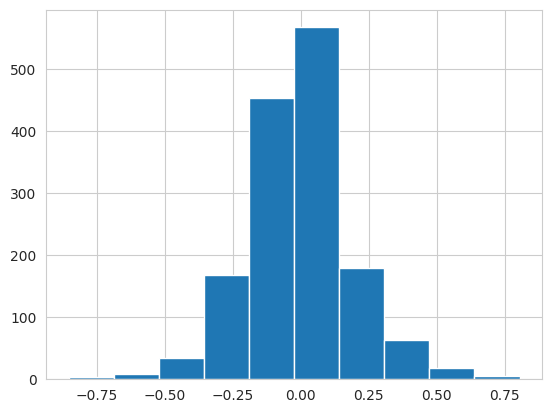

In [14]:
plt.hist((1-xs) - pts.squeeze())

(array([  7.,  53., 419., 769., 220.,  28.,   1.,   2.,   0.,   1.]),
 array([-0.22624483, -0.16572647, -0.10520811, -0.04468974,  0.01582862,
         0.07634698,  0.13686535,  0.19738371,  0.25790207,  0.31842043,
         0.3789388 ]),
 <BarContainer object of 10 artists>)

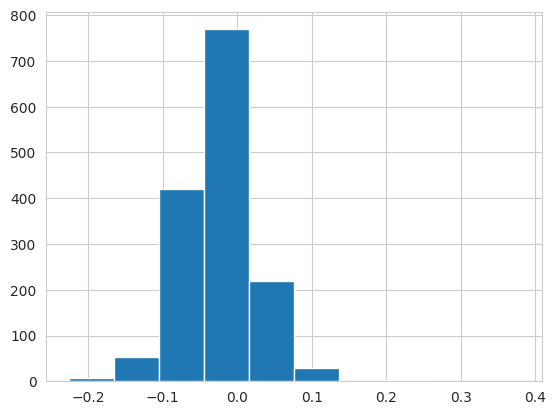

In [15]:
plt.hist((1-pts_diffmap[:, 0]) - pts.squeeze())

(array([  1.,   2.,   5., 283., 953., 252.,   2.,   0.,   1.,   1.]),
 array([-0.36950908, -0.28888694, -0.20826479, -0.12764265, -0.0470205 ,
         0.03360164,  0.11422379,  0.19484593,  0.27546808,  0.35609022,
         0.43671237]),
 <BarContainer object of 10 artists>)

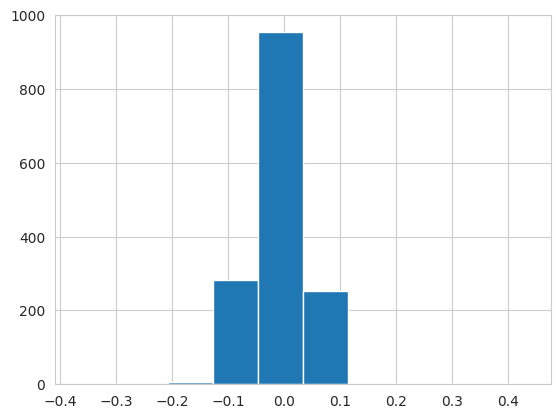

In [22]:
plt.hist(pts_diffmap[:, 0] - pts.squeeze())

In [16]:
mcmc_pool.calculate_ll()
mcmc_base.calculate_ll()

-511651.64875463955

-1435548.624081504

In [17]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [18]:
tau = 2.1 # ignored
self = mcmc_pool
g2, _, _, _, _ = generation.generate_GIRG_nk(self.n, self.d, tau, self.alpha, weights=self.weights,
                                                            pts=self.pts,
                                                            points_type=points.PointsCube)

const_in: 5.278031643091577


In [19]:
nk.overview(g2)

Network Properties:
nodes, edges			1500, 3065
directed?			False
weighted?			False
isolated nodes			118
self-loops			0
density				0.002726
clustering coefficient		0.180714
min/max/avg degree		0, 65, 4.086667
degree assortativity		0.032532
number of connected components	125
size of largest component	1369 (91.27 %)


In [20]:
nk.overview(g)

Network Properties:
nodes, edges			1500, 70078
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062333
clustering coefficient		0.599191
min/max/avg degree		18, 1485, 93.437333
degree assortativity		-0.241129
number of connected components	1
size of largest component	1500 (100.00 %)


In [72]:
np.convolve(acceptances, np.ones(1000) / 1000, mode='valid')[-5:]

array([0.01 , 0.011, 0.012, 0.013, 0.014])

In [77]:
normals = np.random.normal(size=(10, 3), scale=0.2) + 0.2

In [78]:
normals

array([[-0.01478993,  0.46395341,  0.20081983],
       [ 0.05944802,  0.01844976,  0.18450956],
       [ 0.07360955,  0.18247723,  0.86188954],
       [ 0.12131212,  0.26485227,  0.39586862],
       [ 0.02092774,  0.17912435,  0.42717576],
       [ 0.39294921, -0.00649885,  0.22974587],
       [ 0.56264836,  0.0215686 ,  0.07179378],
       [ 0.2166256 ,  0.06392736,  0.29180844],
       [ 0.03339277,  0.0485094 ,  0.16913063],
       [ 0.40940995,  0.27036078,  0.17174164]])

In [79]:
np.clip(normals, 0, 1)

array([[0.        , 0.46395341, 0.20081983],
       [0.05944802, 0.01844976, 0.18450956],
       [0.07360955, 0.18247723, 0.86188954],
       [0.12131212, 0.26485227, 0.39586862],
       [0.02092774, 0.17912435, 0.42717576],
       [0.39294921, 0.        , 0.22974587],
       [0.56264836, 0.0215686 , 0.07179378],
       [0.2166256 , 0.06392736, 0.29180844],
       [0.03339277, 0.0485094 , 0.16913063],
       [0.40940995, 0.27036078, 0.17174164]])

(array([[0., 0., 2., ..., 2., 0., 4.],
        [3., 1., 0., ..., 0., 0., 0.],
        [0., 1., 2., ..., 0., 1., 2.],
        ...,
        [0., 0., 2., ..., 0., 0., 0.],
        [2., 1., 1., ..., 0., 0., 1.],
        [3., 0., 1., ..., 2., 1., 2.]]),
 array([2.59913066e-05, 2.00114981e-02, 3.99970049e-02, 5.99825117e-02,
        7.99680185e-02, 9.99535253e-02, 1.19939032e-01, 1.39924539e-01,
        1.59910046e-01, 1.79895552e-01, 1.99881059e-01, 2.19866566e-01,
        2.39852073e-01, 2.59837580e-01, 2.79823086e-01, 2.99808593e-01,
        3.19794100e-01, 3.39779607e-01, 3.59765114e-01, 3.79750620e-01,
        3.99736127e-01, 4.19721634e-01, 4.39707141e-01, 4.59692648e-01,
        4.79678154e-01, 4.99663661e-01, 5.19649168e-01, 5.39634675e-01,
        5.59620182e-01, 5.79605688e-01, 5.99591195e-01, 6.19576702e-01,
        6.39562209e-01, 6.59547716e-01, 6.79533222e-01, 6.99518729e-01,
        7.19504236e-01, 7.39489743e-01, 7.59475250e-01, 7.79460756e-01,
        7.99446263e-01, 8.19431

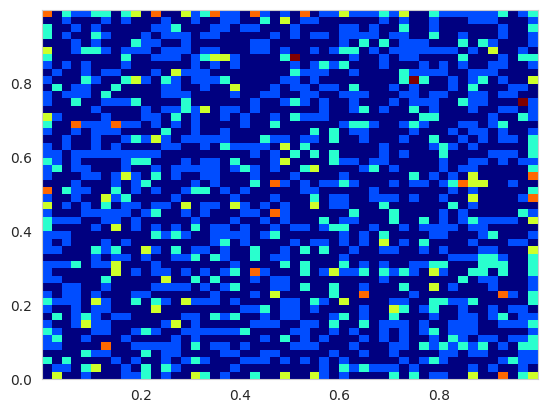

In [66]:
plt.hist2d(xs, ys, bins=(50, 50), cmap=plt.cm.jet)

In [25]:
import importlib
from benji_girgs import mcmc
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [27]:
a = mcmc.MCMC_girg.proposal(1, 2, 0.7).squeeze()
np.random.uniform(size=2).shape

(2,)

(2,)

In [6]:
generation.get_probs_us(mcmc_pool.weights, mcmc_pool.pts, mcmc_pool.alpha, mcmc_pool.const_in, [0, 1, 2]).shape

../benji_girgs/generation.py:90: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


(3, 1500)

In [11]:
a = generation.get_probs_u(mcmc_pool.weights, mcmc_pool.pts, mcmc_pool.alpha, mcmc_pool.const_in, 0)
b = generation.get_probs_us(mcmc_pool.weights, mcmc_pool.pts, mcmc_pool.alpha, mcmc_pool.const_in, [0])
np.all(a == b)

../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:90: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


True

In [15]:
asdf = mcmc_pool.pts
asdf.shape
u_indices = [0, 1, 2]
probs = generation.get_probs_u(mcmc_pool.weights, mcmc_pool.pts, mcmc_pool.alpha, mcmc_pool.const_in, u_indices)

(1500, 2)

ValueError: operands could not be broadcast together with shapes (3,) (1500,) 

In [16]:
n,d = asdf.shape

In [17]:
wuwv = np.outer(mcmc_pool.weights[u_indices], mcmc_pool.weights)
wuwv.shape
dists = asdf[u_indices].dists(asdf)
p_uv = np.divide(wuwv, dists**d)
p_uv.shape

(3, 1500)

/scratch/tmp.17766889.bdayan/ipykernel_85141/1361296848.py:4: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


(3, 1500)

In [9]:
asdf

PointsCube([[0.12489963, 0.62067574],
            [0.10335019, 0.68407014],
            [0.63450706, 0.18528188],
            ...,
            [0.57354881, 0.09903026],
            [0.88999225, 0.84450307],
            [0.87772102, 0.80716752]])

In [97]:
asdf[u_indices].shape
asdf.shape

pts1 = asdf[u_indices]
pts2 = asdf

(pts1[:, None, :] - pts2[None, :, :]).shape

(3, 2)

(1500, 2)

(3, 1500, 2)

  1%|▏         | 66/5000 [00:00<00:57, 86.46it/s]../benji_girgs/mcmc.py:126: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
  2%|▏         | 110/5000 [00:01<00:42, 114.67it/s]../benji_girgs/mcmc.py:126: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
6361it [00:20, 312.90it/s]                          


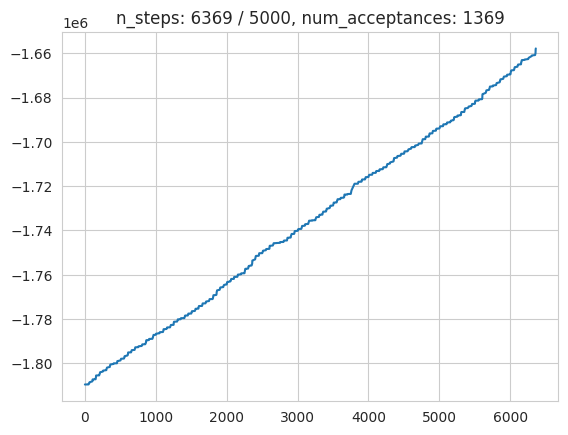

In [6]:
mcmc_pool = mcmc.MCMC_girg(g, weights, alpha, const2, pts_diffmap.copy(), pool=True)
mcmc_pool.run_pool2(5000, pool_size=10, jobs_per_worker=5, plot_every=20)
mcmc_pool.plot_ll(5000)

2056it [00:06, 300.85it/s]                          


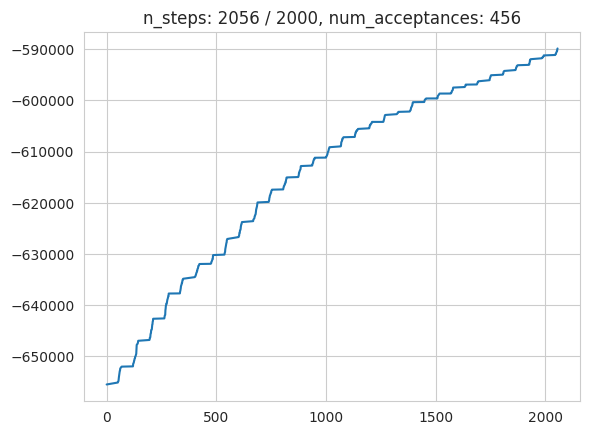

In [14]:
mcmc_pool = mcmc.MCMC_girg(g, weights, alpha, const2, pts_diffmap.copy(), pool=True)
mcmc_pool.run_pool(2000, pool_size=10, jobs_per_worker=5, plot_every=20)
mcmc_pool.plot_ll(2000)

In [15]:
mcmc_pool.ll

-589842.4039731625

In [16]:
mcmc_pool.calculate_ll()

-592313.4560170424

 86%|████████▋ | 1730/2000 [00:18<00:02, 96.87it/s] ../benji_girgs/mcmc.py:126: RuntimeWarning: overflow encountered in exp
  Q_ratio = np.exp(u_ll_new - u_ll_old)
100%|██████████| 2000/2000 [00:21<00:00, 94.51it/s] 


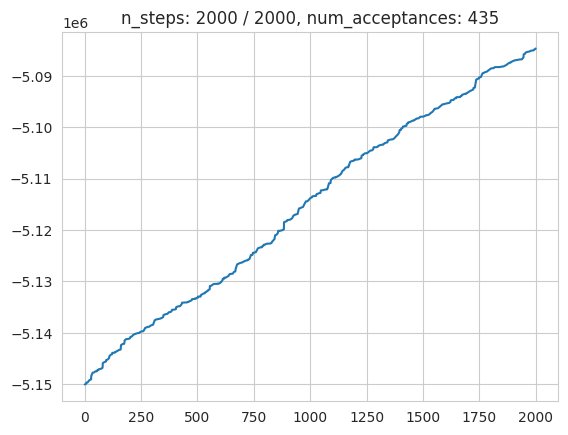

In [11]:
mcmc_pool = mcmc.MCMC_girg(g, weights, alpha, const2, pts_diffmap.copy(), pool=True)
mcmc_pool.run_pool(2000, pool_size=1, jobs_per_worker=5, plot_every=20)
mcmc_pool.plot_ll(2000)